In this project, I've successfully developed a machine learning model to predict future sales by analyzing the impact of various advertising channels. Leveraging data on TV, Radio, and Newspaper expenditures, I've achieved accurate sales forecasts, enabling data-driven decision-making for advertising strategies.

In [1]:
# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df=pd.read_csv('dataset\Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
# Check for missing values in each column
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
# Split Data into Features and Target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']


In [8]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Define a list of regression models
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree Regressor", DecisionTreeRegressor(random_state=42)),
    ("Random Forest Regressor", RandomForestRegressor(random_state=42))
]


In [10]:
best_model = None
best_mse = float("inf")  # Initialize with a high value
best_r2 = -float("inf")   # Initialize with a low value


In [11]:
# Iterate through the models and evaluate their performance
for name, model in models:
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    
    # Calculate R-squared (coefficient of determination)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print("-" * 50)
    
    # Check if the current model is better than the previous best model
    if mse < best_mse:
        best_mse = mse
        best_r2 = r2
        best_model = model
    print()

Model: Linear Regression
Mean Squared Error: 3.174097353976105
R-squared: 0.899438024100912
--------------------------------------------------

Model: Decision Tree Regressor
Mean Squared Error: 2.175
R-squared: 0.9310914968293178
--------------------------------------------------

Model: Random Forest Regressor
Mean Squared Error: 0.5907322499999988
R-squared: 0.9812843792541843
--------------------------------------------------



In [12]:
# Print the best model and its performance
print("\nBest Model:",best_model)

print("Best Mean Squared Error:", best_mse)
print("Best R-squared:", best_r2)


Best Model: RandomForestRegressor(random_state=42)
Best Mean Squared Error: 0.5907322499999988
Best R-squared: 0.9812843792541843


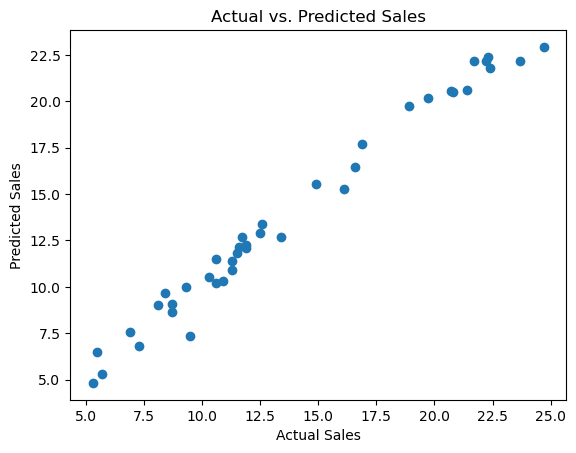

In [13]:
# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()